<a href="https://colab.research.google.com/github/butt3rr/Spotify-EDA/blob/main/spotify_dsc4013_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load dataset
df = pd.read_csv("songs_normalize.csv")

In [ ]:
#check number of rows and columns
df.shape

(2000, 18)

In [ ]:
#display few rows of dataset
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
#return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
#drop unnecessary column
df = df.drop(columns = ['key', 'instrumentalness', 'mode', 'speechiness'])

In [ ]:
#drop row with year column is 2020
df = df[df['year'] != 2020]

In [ ]:
#check number of rows and columns
df.shape

(1997, 14)

In [ ]:
#find missing values
#Display number missing values per column
df.isna().sum()

artist          0
song            0
duration_ms     0
explicit        0
year            0
popularity      0
danceability    0
energy          0
loudness        0
acousticness    0
liveness        0
valence         0
tempo           0
genre           0
dtype: int64

In [ ]:
#count number of duplicates
df.duplicated().sum()

59

In [ ]:
#remove all duplicates and update dataset
df.drop_duplicates(inplace=True)

In [ ]:
#new data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        1938 non-null   object 
 1   song          1938 non-null   object 
 2   duration_ms   1938 non-null   int64  
 3   explicit      1938 non-null   bool   
 4   year          1938 non-null   int64  
 5   popularity    1938 non-null   int64  
 6   danceability  1938 non-null   float64
 7   energy        1938 non-null   float64
 8   loudness      1938 non-null   float64
 9   acousticness  1938 non-null   float64
 10  liveness      1938 non-null   float64
 11  valence       1938 non-null   float64
 12  tempo         1938 non-null   float64
 13  genre         1938 non-null   object 
dtypes: bool(1), float64(7), int64(3), object(3)
memory usage: 213.9+ KB


In [ ]:
#new statistic
df.describe()

,duration_ms,year,popularity,danceability,energy,loudness,acousticness,liveness,valence,tempo
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,228612.310114,2009.504128,59.658411,0.667694,0.721450,-5.514994,0.128144,0.181613,0.552986,120.146082
std,39271.704373,5.865577,21.504605,0.140551,0.152898,1.940163,0.172584,0.140740,0.220924,26.971077
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,-20.514000,0.000019,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,-6.490750,0.013525,0.088250,0.390000,98.985250
50%,223219.500000,2010.000000,65.000000,0.676000,0.739000,-5.285000,0.055800,0.124500,0.560000,120.032000
75%,248036.000000,2015.000000,73.000000,0.765000,0.840000,-4.168000,0.176000,0.241750,0.731000,134.191750
max,484146.000000,2019.000000,89.000000,0.975000,0.999000,-0.276000,0.976000,0.853000,0.973000,210.851000


In [ ]:
#count value for each year
songsPerYear = df['year'].value_counts()
songsPerYear


year
2012    113
2017    110
2001    106
2018    104
2010    103
2005    101
2014    100
2016     98
2011     96
2004     95
2006     93
2015     93
2008     91
2003     91
2007     90
2019     89
2013     87
2002     86
2009     82
2000     71
1999     38
1998      1
Name: count, dtype: int64

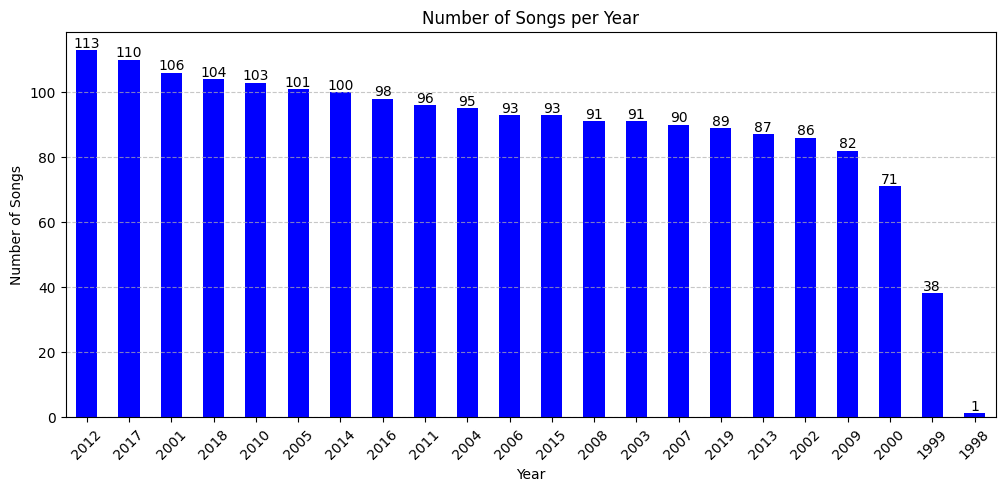

In [ ]:
#create bar chart (can create line chart also)
ax = songsPerYear.plot(kind='bar', color='blue', figsize=(12, 5))

plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



In [ ]:
#count number of artist frequency in dataset
artists = df['artist'].value_counts()
artists


artist
Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
INNA               1
Big Tymers         1
DJ Sammy           1
Cam’ron            1
Blanco Brown       1
Name: count, Length: 832, dtype: int64

In [ ]:
#display artist total song and average popularity
artist_df = df[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')

artists = artists.sort_index()

artist_df['total songs'] = artists.values

artist_df.sort_values(by='total songs',ascending=False, inplace=True)

artist_df.reset_index(inplace=True)

artist_df

,artist,popularity,total songs
0,Rihanna,72.260870,23
1,Drake,61.913043,23
2,Eminem,72.333333,21
3,Calvin Harris,67.800000,20
4,Britney Spears,63.052632,19
...,...,...,...
827,Kent Jones,63.000000,1
828,BLACKPINK,1.000000,1
829,BTS,35.000000,1
830,Baauer,57.000000,1


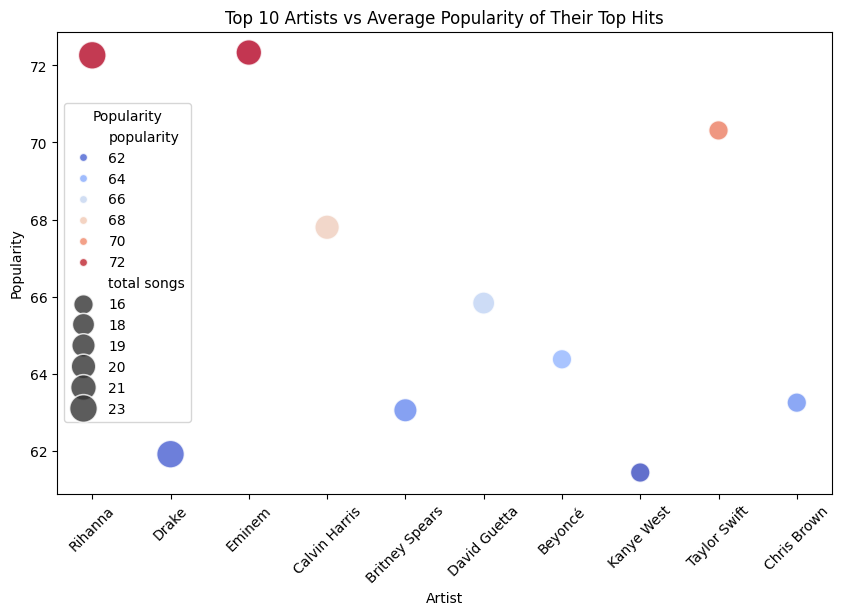

In [ ]:
#create scatter plot
top_10_artists = artist_df.head(10)

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10_artists, x='artist', y='popularity', size='total songs', sizes=(200, 400),
                hue='popularity', palette='coolwarm', alpha=0.8)

plt.title('Top 10 Artists vs Average Popularity of Their Top Hits')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Popularity')  # Show legend for the popularity levels
plt.show()


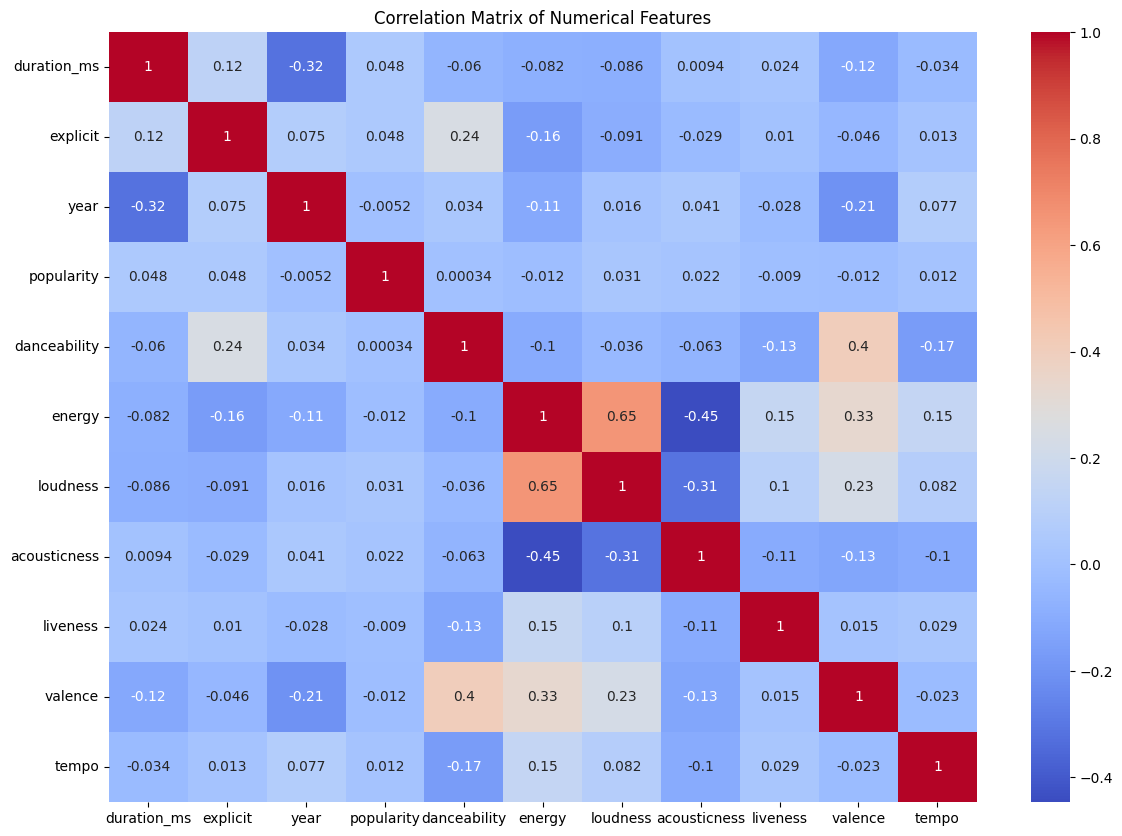

In [ ]:
#how dataset connect to each other
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=['float64', 'int64', 'bool']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Energy is highly positively relate with loudness.

Acousticness is highly negatively relate with loudness.

Acousticness is highly negatively relate with energy.

In [ ]:
#most popular songs on spotify from 2000-2019
print('Top 10 Most Popular Songs on Spotify (2000-2019)')
df[['song', 'artist', 'year', 'popularity']].sort_values(by='popularity', ascending=False)[:10]

Top 10 Most Popular Songs on Spotify (2000-2019)


,song,artist,year,popularity
1322,Sweater Weather,The Neighbourhood,2013,89
1311,Another Love,Tom Odell,2013,88
201,Without Me,Eminem,2002,87
1613,Wait a Minute!,WILLOW,2015,86
1819,lovely (with Khalid),Billie Eilish,2018,86
6,The Real Slim Shady,Eminem,2000,86
209,'Till I Collapse,Eminem,2002,85
1227,Locked out of Heaven,Bruno Mars,2012,85
1709,Perfect,Ed Sheeran,2017,85
1999,Circles,Post Malone,2019,85


<ipython-input-21-770aa3e37338>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, palette=palette_colors)


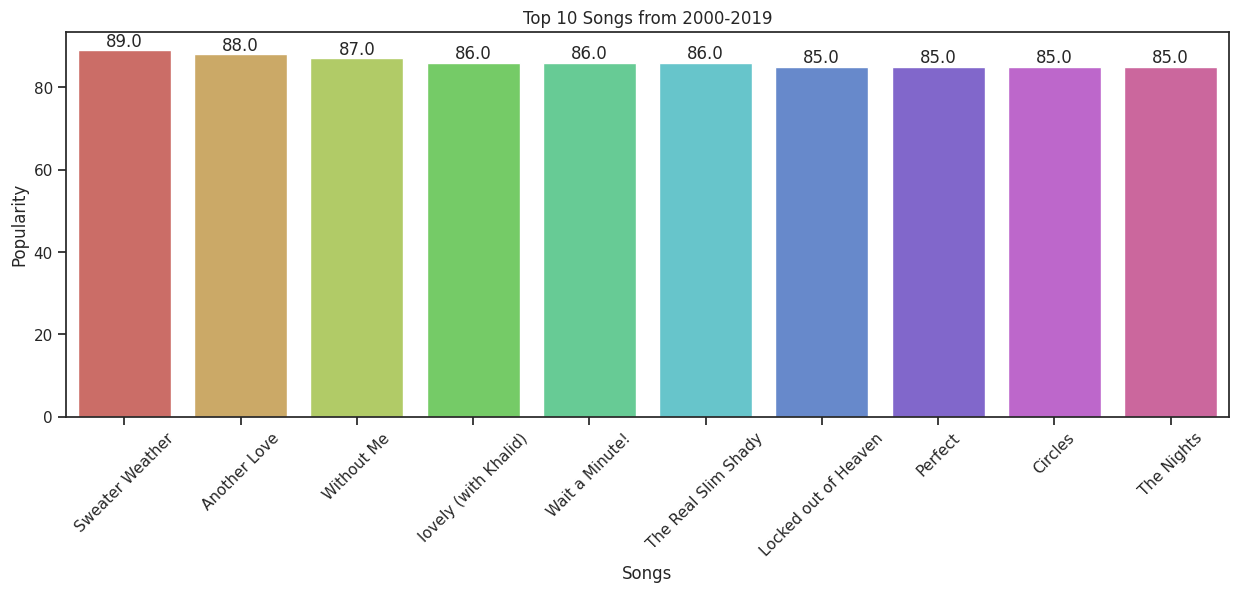

In [ ]:
#create graph
plt.figure(figsize=(15,5))
sns.set(style="ticks")
x = df.groupby("song")["popularity"].max().sort_values(ascending=False).head(10)
palette_colors = sns.color_palette("hls",10)
ax = sns.barplot(x=x.index, y=x, palette=palette_colors)
ax.set_title("Top 10 Songs from 2000-2019")
ax.set_ylabel('Popularity')
ax.set_xlabel ('Songs')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            f'{height:.1f}',
            ha='center',
            va='bottom')

plt.show()

<ipython-input-22-49bd83783889>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, palette=palette_colors)


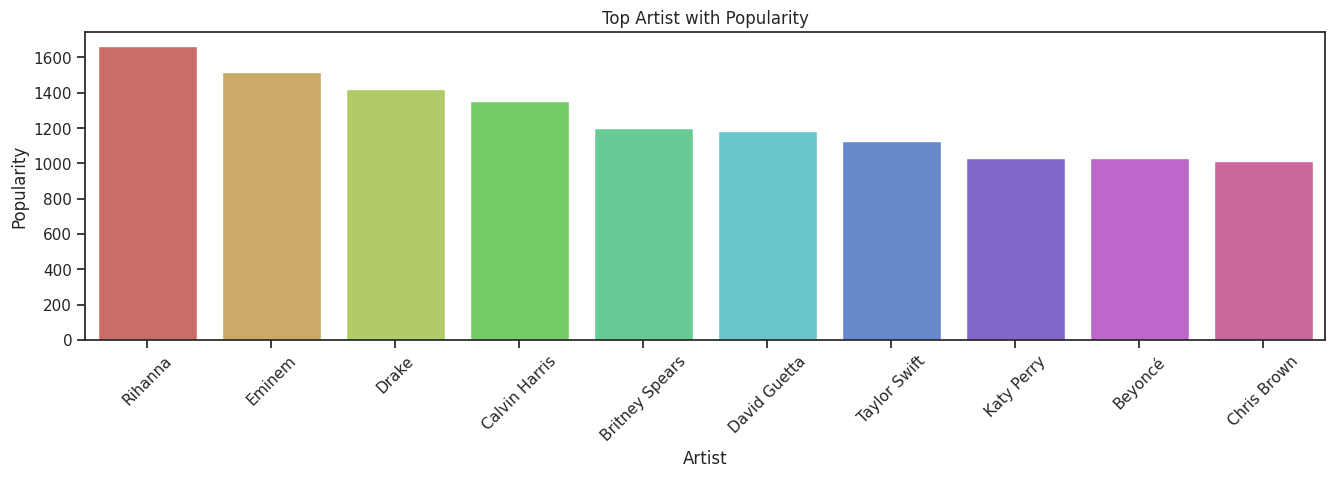

In [ ]:
#Most popular artist on spotify
plt.figure(figsize=(16,4))
sns.set(style="ticks")
x = df.groupby("artist")["popularity"].sum().sort_values(ascending=False).head(10)
palette_colors = sns.color_palette("hls",10)
ax = sns.barplot(x=x.index, y=x, palette=palette_colors)
ax.set_title("Top Artist with Popularity")
ax.set_ylabel('Popularity')
ax.set_xlabel ('Artist')
plt.xticks(rotation=45)
plt.show()

In [ ]:
song_counts=df.artist.value_counts()[:10]
song_counts

artist
Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
David Guetta      18
Chris Brown       16
Katy Perry        16
Taylor Swift      16
Beyoncé           16
Name: count, dtype: int64

In [ ]:
#Song duration in minutes:seconds
temp = df.loc[:, ['artist', 'song', 'duration_ms', 'year']]

temp['min:sec'] = temp['duration_ms'] / 1000  # Convert milliseconds to seconds
temp['minutes'] = temp['min:sec'] // 60  # Extract whole minutes
temp['seconds'] = temp['min:sec'] % 60  # Extract remaining seconds

# Format minutes and seconds as strings with leading zeros
temp['min:sec'] = pd.to_datetime(temp['duration_ms'], unit='ms').dt.strftime('%M:%S')
temp.drop(['duration_ms', 'minutes', 'seconds'], axis=1, inplace=True)


print(temp)

              artist                                    song  year min:sec
0     Britney Spears                  Oops!...I Did It Again  2000   03:31
1          blink-182                    All The Small Things  1999   02:47
2         Faith Hill                                 Breathe  1999   04:10
3           Bon Jovi                            It's My Life  2000   03:44
4             *NSYNC                             Bye Bye Bye  2000   03:20
...              ...                                     ...   ...     ...
1995  Jonas Brothers                                  Sucker  2019   03:01
1996    Taylor Swift                            Cruel Summer  2019   02:58
1997    Blanco Brown                              The Git Up  2019   03:20
1998       Sam Smith  Dancing With A Stranger (with Normani)  2019   02:51
1999     Post Malone                                 Circles  2019   03:35

[1938 rows x 4 columns]


In [ ]:
#find max and min duration song
max_duration_row= temp.duration_ms.idxmax()
temp.loc[max_duration_row, 'min:sec'] = pd.to_datetime(temp.loc[max_duration_row, 'duration_ms'], unit='ms').strftime('%M:%S')

min_duration_row = temp.duration_ms.idxmin()
temp.loc[min_duration_row, 'min:sec'] = pd.to_datetime(temp.loc[min_duration_row, 'duration_ms'], unit='ms').strftime('%M:%S')

print("Longest Track:")
print(temp.loc[max_duration_row, ['artist', 'song', 'min:sec', 'year']])

print("\nShortest Track:")
print(temp.loc[min_duration_row, ['artist', 'song', 'min:sec', 'year']])
print("\n")



AttributeError: 'DataFrame' object has no attribute 'duration_ms'

In [ ]:
#Most successful year based on popularity rating
group_yr=df.groupby('year')['popularity'].sum().sort_values()
group_yr

year
1998      49
1999    2467
2000    4135
2013    4746
2009    5086
2015    5277
2016    5287
2006    5316
2002    5341
2003    5347
2007    5353
2004    5570
2011    5574
2019    5608
2008    5752
2014    5897
2017    5923
2005    6228
2010    6234
2001    6291
2012    6803
2018    7334
Name: popularity, dtype: int64

In [ ]:
#create bar graph
plt.figure(figsize=(14, 6))
sns.barplot(x=group_yr.index, y=group_yr.popularity, data=group_yr)

for index, value in enumerate(group_yr.popularity):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')


plt.title('Popularity Sum by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

AttributeError: 'Series' object has no attribute 'popularity'

<Figure size 1400x600 with 0 Axes>

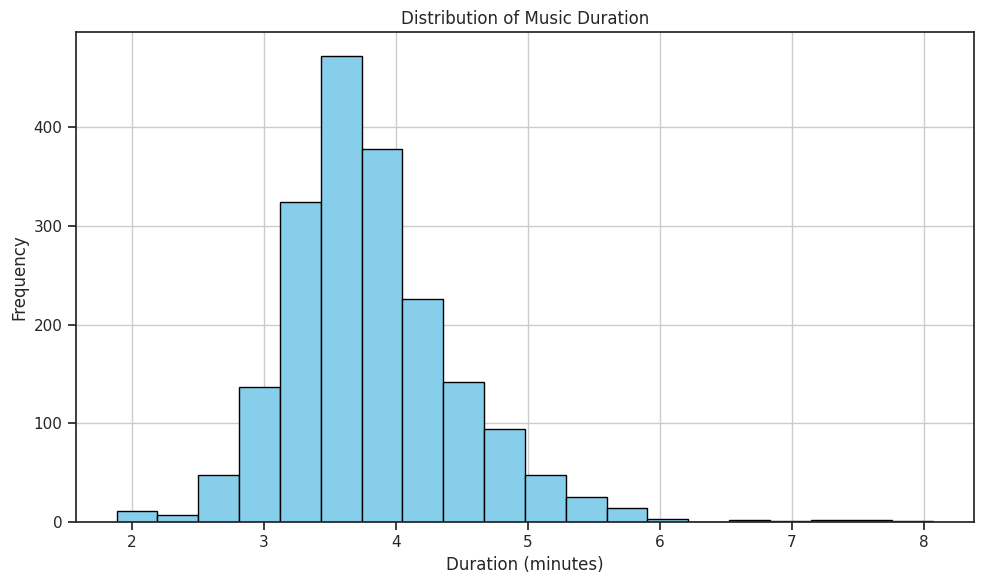

In [ ]:
# Create a histogram for the duration of music
duration_minutes = df['duration_ms'] / (1000 * 60)  # Convert milliseconds to minutes

plt.figure(figsize=(10, 6))
plt.hist(duration_minutes, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Music Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the average duration of songs for every year
avg_duration_by_year = df.groupby('year')['duration_ms'].mean()

avg_duration_by_year_minutes = avg_duration_by_year / (1000 * 60)
avg_duration_by_year_seconds = avg_duration_by_year / 1000

avg_duration_by_year_min_sec = avg_duration_by_year_minutes.apply(lambda x: f"{int(x):02d}:{int((x - int(x)) * 60):02d}")

avg_duration_table = pd.DataFrame({
    'Average Duration (min:sec)': avg_duration_by_year_min_sec
})

print(avg_duration_table)

     Average Duration (min:sec)
year                           
1998                      03:35
1999                      04:13
2000                      04:10
2001                      04:02
2002                      04:11
2003                      03:56
2004                      03:53
2005                      03:57
2006                      03:58
2007                      03:52
2008                      03:54
2009                      03:55
2010                      03:40
2011                      03:48
2012                      03:43
2013                      03:50
2014                      03:39
2015                      03:39
2016                      03:40
2017                      03:32
2018                      03:28
2019                      03:16


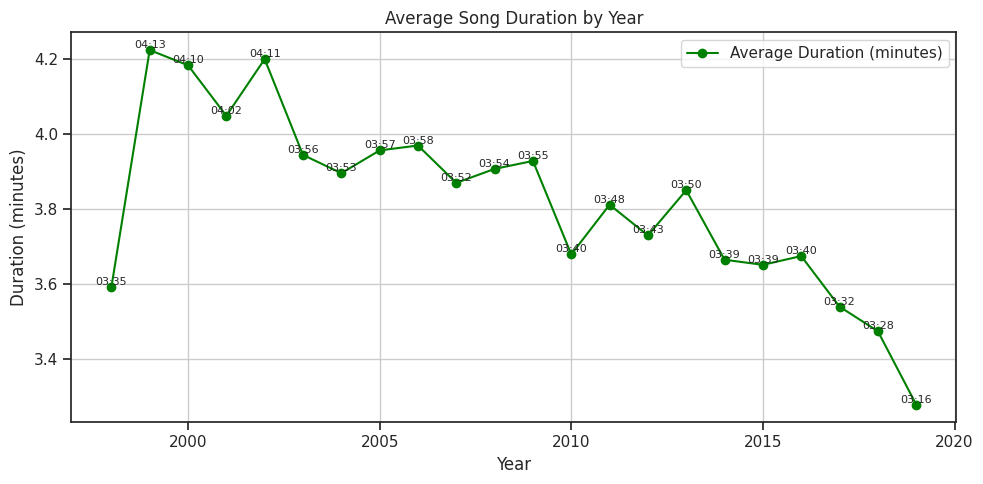

In [ ]:

# Calculate the average duration of songs for every year
avg_duration_by_year = df.groupby('year')['duration_ms'].mean()

avg_duration_by_year_minutes = avg_duration_by_year / (1000 * 60)
avg_duration_by_year_seconds = avg_duration_by_year / 1000
avg_duration_by_year_min_sec = avg_duration_by_year_minutes.apply(lambda x: f"{int(x):02d}:{int((x - int(x)) * 60):02d}")

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(avg_duration_by_year_minutes, marker='o', color='green', label='Average Duration (minutes)')


for year, duration in avg_duration_by_year_minutes.items():
    plt.text(year, duration, f"{avg_duration_by_year_min_sec[year]}", ha='center', va='bottom', fontsize=8)

plt.title('Average Song Duration by Year')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


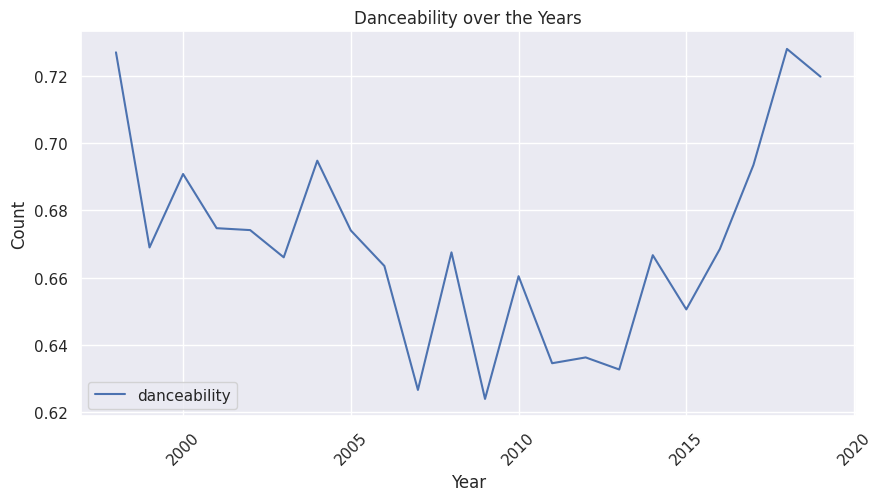

In [ ]:
#trend analysis
#how danceability of songs changed over the years

#most danceable songs on spotify
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
columns=["danceability"]
for col in columns:
  x = df.groupby("year")[col].mean()
  ax = sns.lineplot(x=x.index, y=x, label=col)
ax.set_title("Danceability over the Years")
ax.set_ylabel('Count')
ax.set_xlabel ('Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-37-113ca964a1f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, palette=palette_colors)


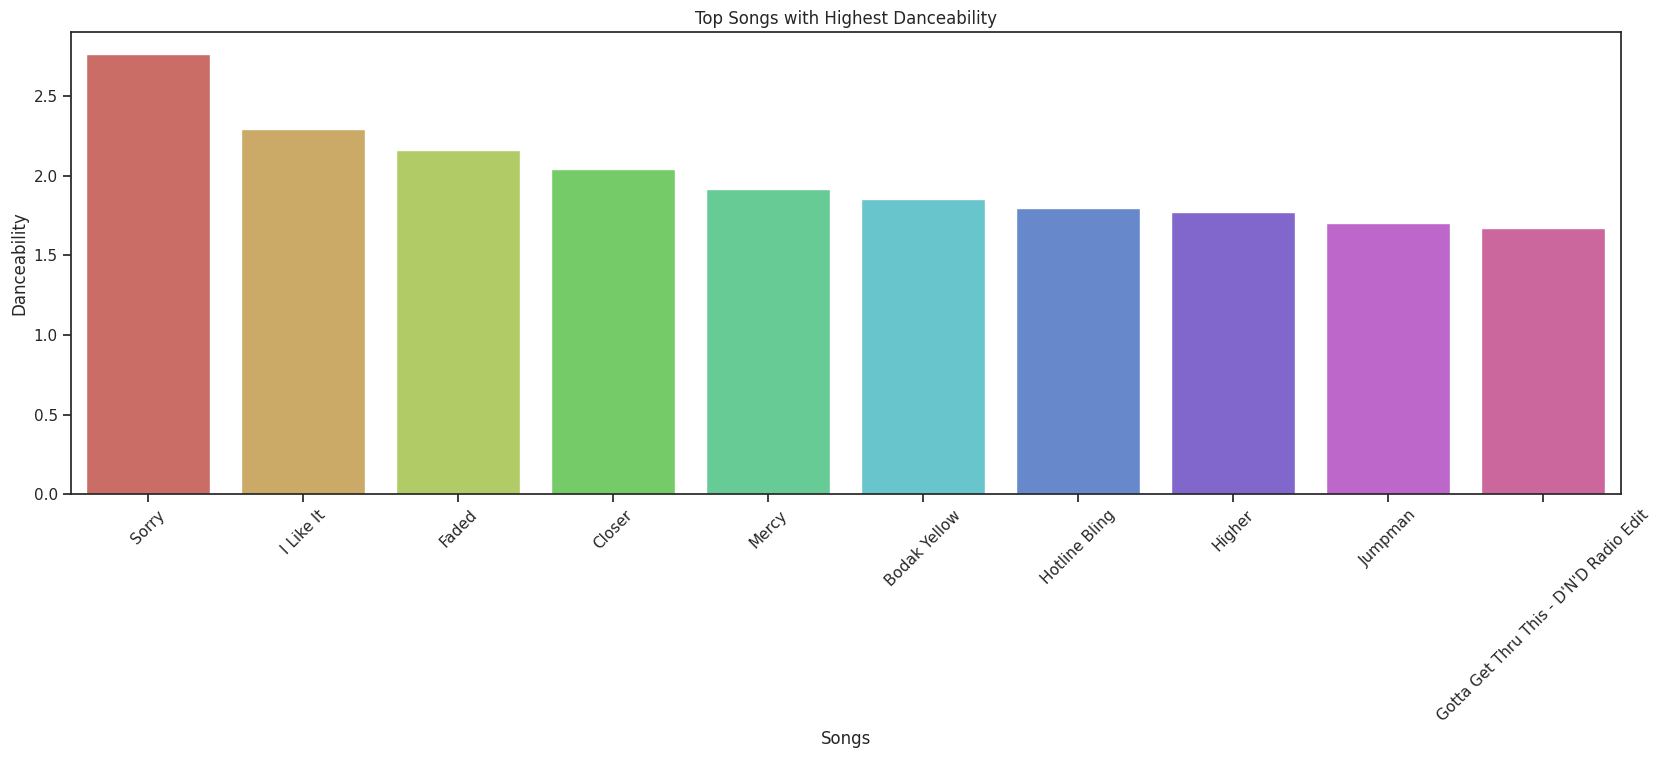

In [ ]:
#most danceable songs
plt.figure(figsize=(20,6))
sns.set(style="ticks")
x = df.groupby("song")["danceability"].sum().sort_values(ascending=False).head(10)
palette_colors = sns.color_palette("hls",10)
ax = sns.barplot(x=x.index, y=x, palette=palette_colors)
ax.set_title("Top Songs with Highest Danceability")
ax.set_ylabel('Danceability')
ax.set_xlabel ('Songs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.artist[df['danceability']==df['danceability'].max()])
print(df.song[df['danceability']==df['danceability'].max()])

714    Timbaland
Name: artist, dtype: object
714    Give It To Me
Name: song, dtype: object


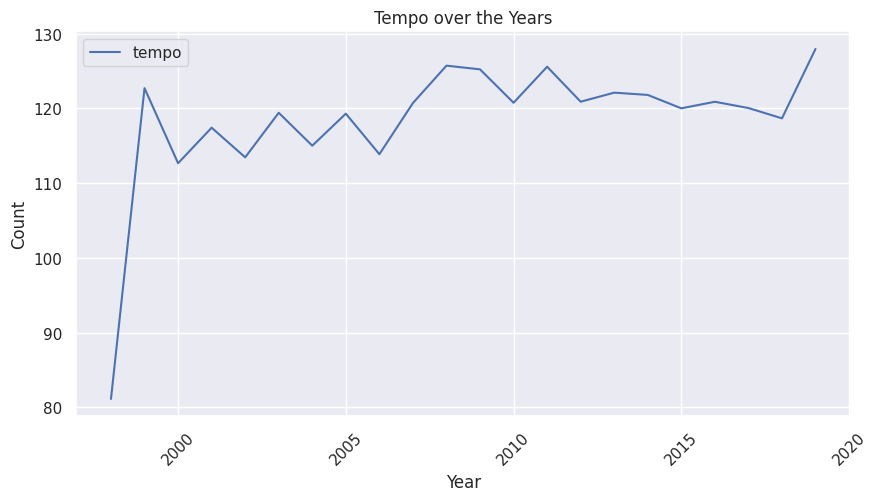

In [ ]:
#how tempo has changed over the years
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
columns=["tempo"]
for col in columns:
  x = df.groupby("year")[col].mean()
  ax = sns.lineplot(x=x.index, y=x, label=col)
ax.set_title("Tempo over the Years")
ax.set_ylabel('Count')
ax.set_xlabel ('Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-fe79b579fc36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, palette=palette_colors)


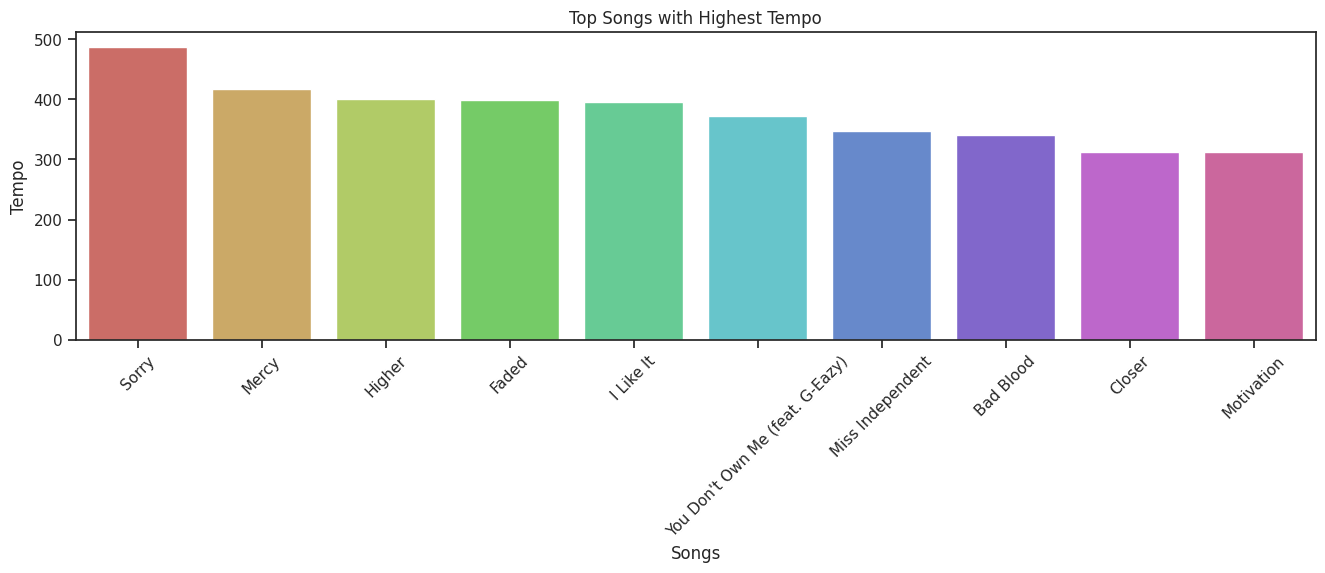

In [ ]:
#songs with highest tempo
plt.figure(figsize=(16,4))
sns.set(style="ticks")
x = df.groupby("song")["tempo"].sum().sort_values(ascending=False).head(10)
palette_colors = sns.color_palette("hls",10)
ax = sns.barplot(x=x.index, y=x, palette=palette_colors)
ax.set_title("Top Songs with Highest Tempo")
ax.set_ylabel('Tempo')
ax.set_xlabel ('Songs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.song[df['tempo']==df['tempo'].max()])
print(df.artist[df['tempo']==df['tempo'].max()])

617    Buttons
Name: song, dtype: object
617    The Pussycat Dolls
Name: artist, dtype: object


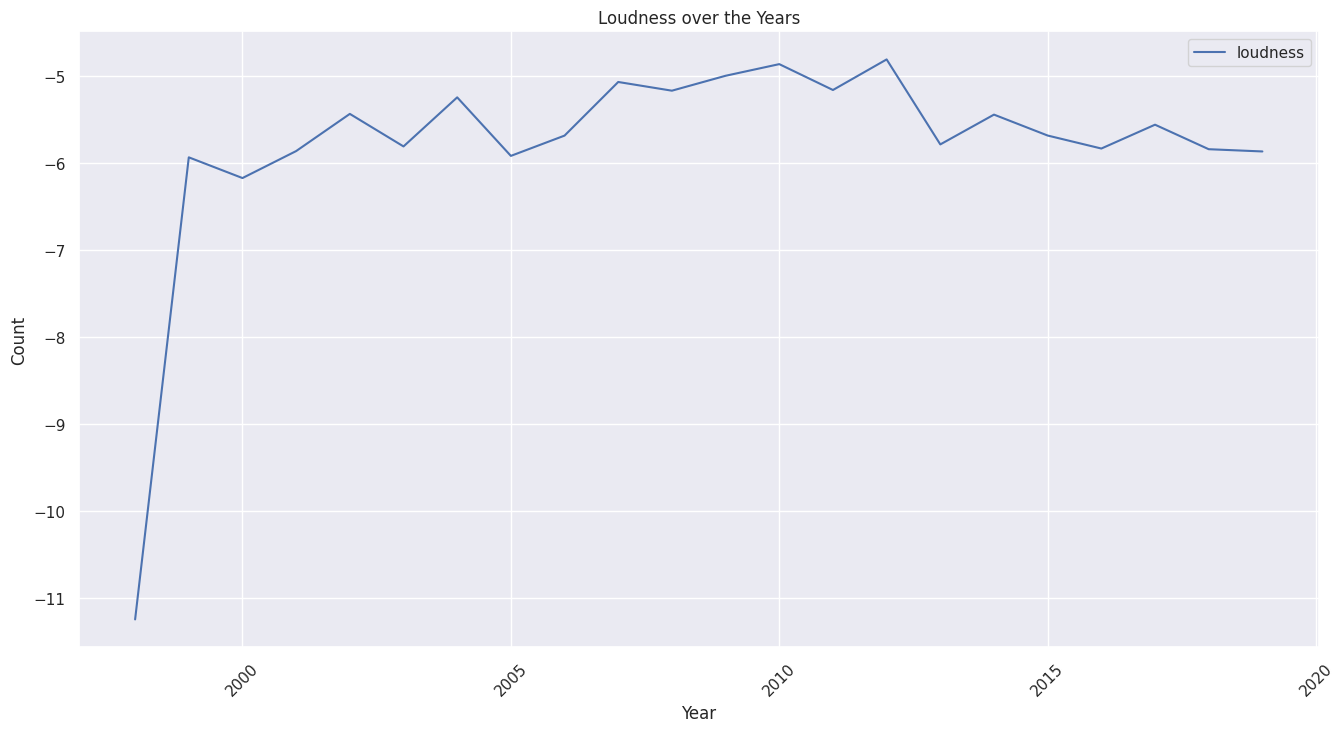

In [ ]:
#how loudness changed over the years
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
columns=["loudness"]
for col in columns:
  x = df.groupby("year")[col].mean()
  ax = sns.lineplot(x=x.index, y=x, label=col)
ax.set_title("Loudness over the Years")
ax.set_ylabel('Count')
ax.set_xlabel ('Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-43-bd9cffc9349d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, palette=palette_colors)


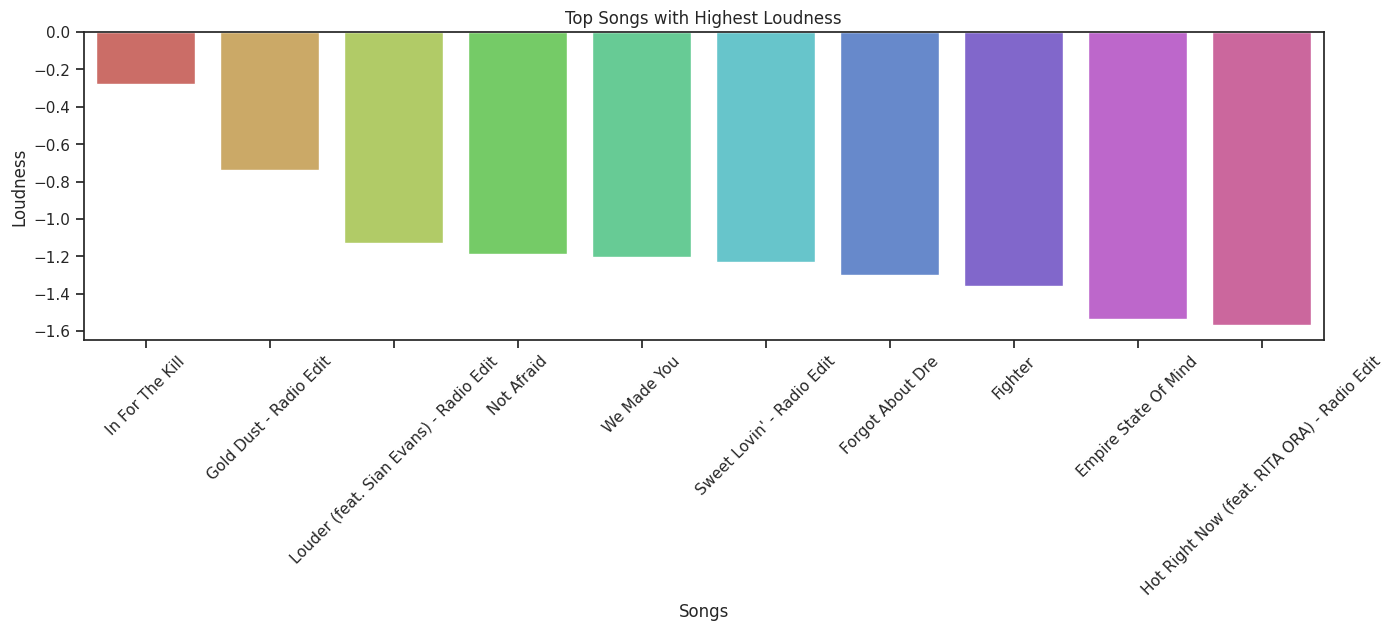

In [ ]:
#loudest song
plt.figure(figsize=(16,4))
sns.set(style="ticks")
x = df.groupby("song")["loudness"].sum().sort_values(ascending=False).head(10)
palette_colors = sns.color_palette("hls",10)
ax = sns.barplot(x=x.index, y=x, palette=palette_colors)
ax.set_title("Top Songs with Highest Loudness")
ax.set_ylabel('Loudness')
ax.set_xlabel ('Songs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_3_max_loudness = df.nlargest(3, 'loudness')
print(top_3_max_loudness[['song', 'year', 'loudness']])

                                        song  year  loudness
971                          In For The Kill  2009    -0.276
1017                  Gold Dust - Radio Edit  2010    -0.740
1132  Louder (feat. Sian Evans) - Radio Edit  2012    -1.131


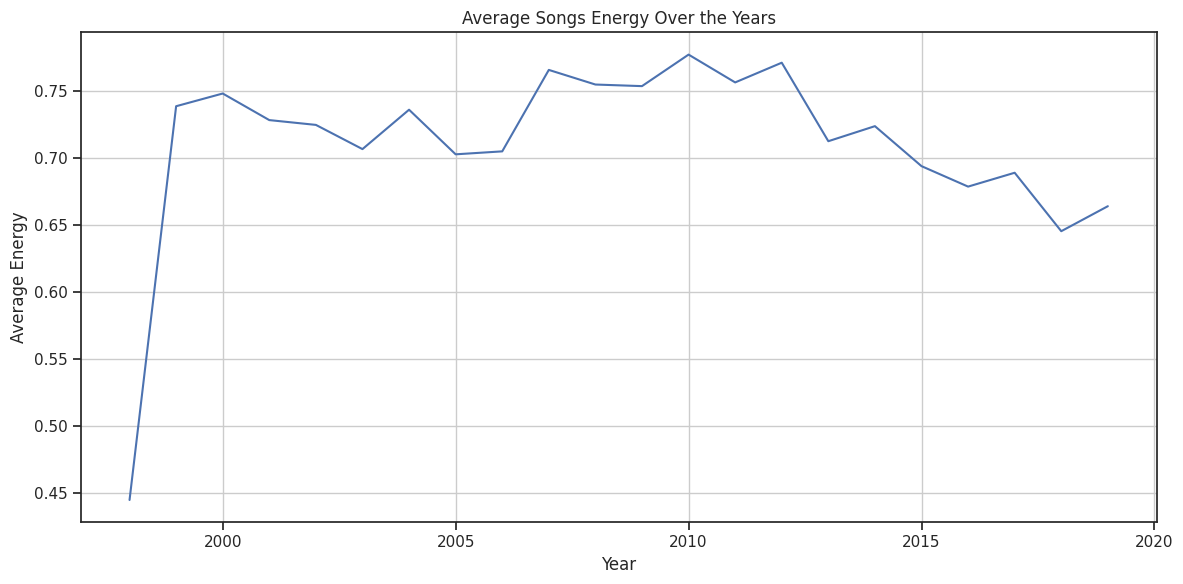

In [ ]:
#how energy change over the years
plt.figure(figsize=(12, 6))
avg_energy_by_year = df.groupby('year')['energy'].mean()
ax = sns.lineplot(x=avg_energy_by_year.index, y=avg_energy_by_year)
ax.set_xlabel('Year')
ax.set_ylabel('Average Energy')
ax.set_title('Average Songs Energy Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-46-44c1364852e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, palette=palette_colors)


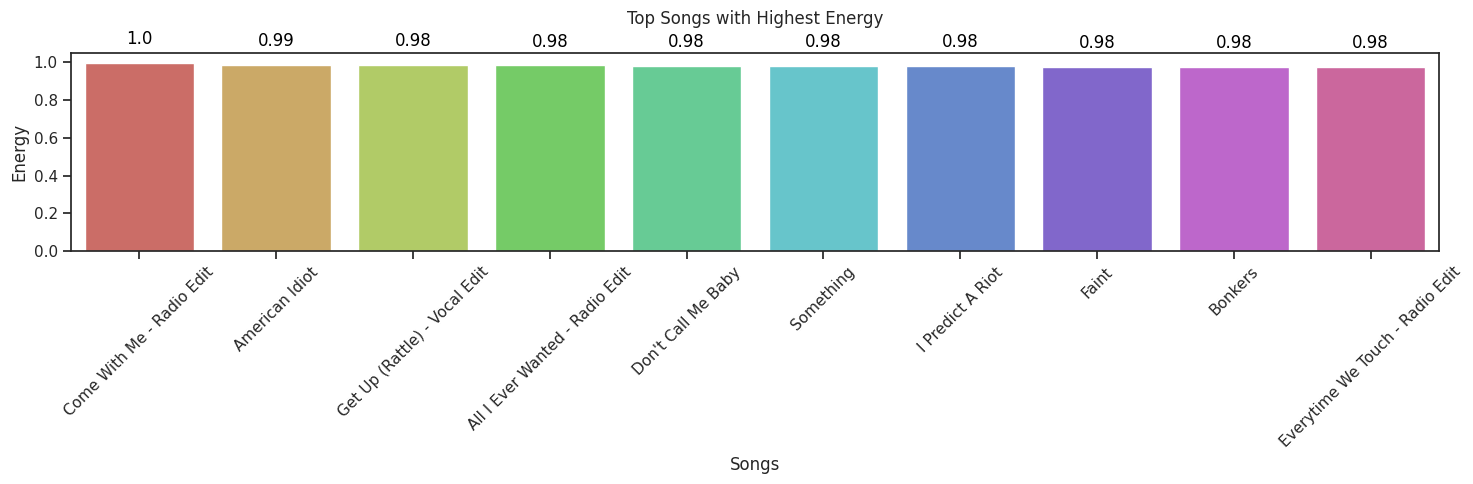

In [ ]:
#most energetic songs
plt.figure(figsize=(15,5))
sns.set(style="ticks")
x = df.groupby("song")["energy"].mean().sort_values(ascending=False).head(10)
palette_colors = sns.color_palette("hls",10)
ax = sns.barplot(x=x.index, y=x, palette=palette_colors)

for i, val in enumerate(x):
    ax.text(i, val + 0.1, round(val, 2), ha='center', color='black')

ax.set_title("Top Songs with Highest Energy\n")
ax.set_ylabel('Energy')
ax.set_xlabel ('Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
top_3_max_energy = df.nlargest(3, 'energy')
print(top_3_max_energy[['song', 'year', 'energy']])

                              song  year  energy
477      Come With Me - Radio Edit  2004   0.999
472                 American Idiot  2004   0.988
1309  Get Up (Rattle) - Vocal Edit  2013   0.985


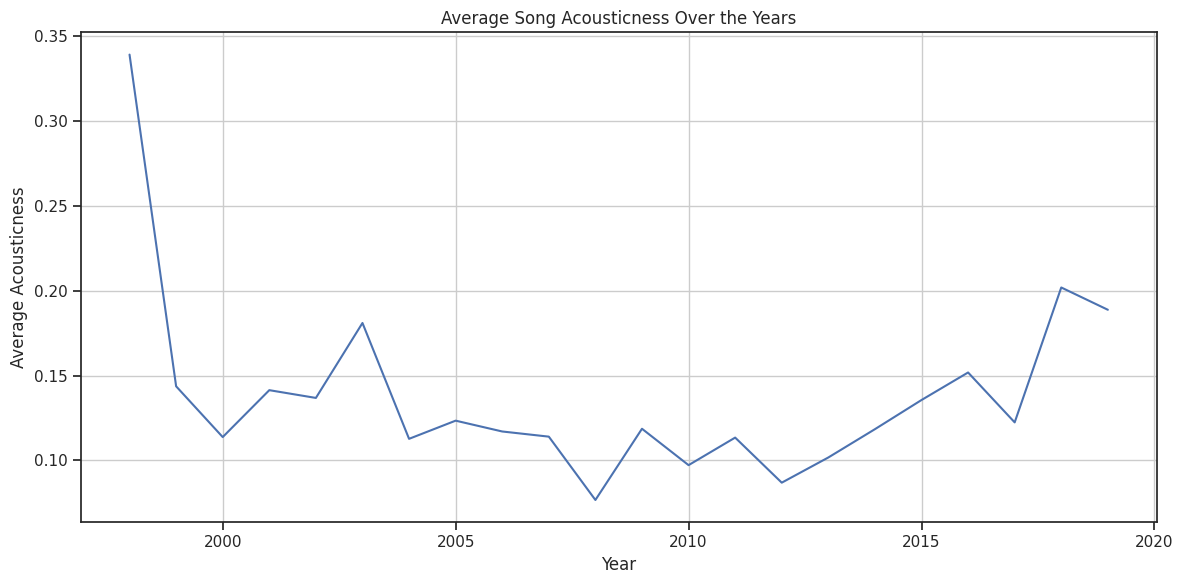

In [ ]:
#acousticness changed over the years
plt.figure(figsize=(12, 6))
avg_acousticness_by_year = df.groupby('year')['acousticness'].mean()
ax = sns.lineplot(x=avg_acousticness_by_year.index, y=avg_acousticness_by_year)
ax.set_xlabel('Year')
ax.set_ylabel('Average Acousticness')
ax.set_title('Average Song Acousticness Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-49-2a0e3576c8d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, palette=palette_colors)


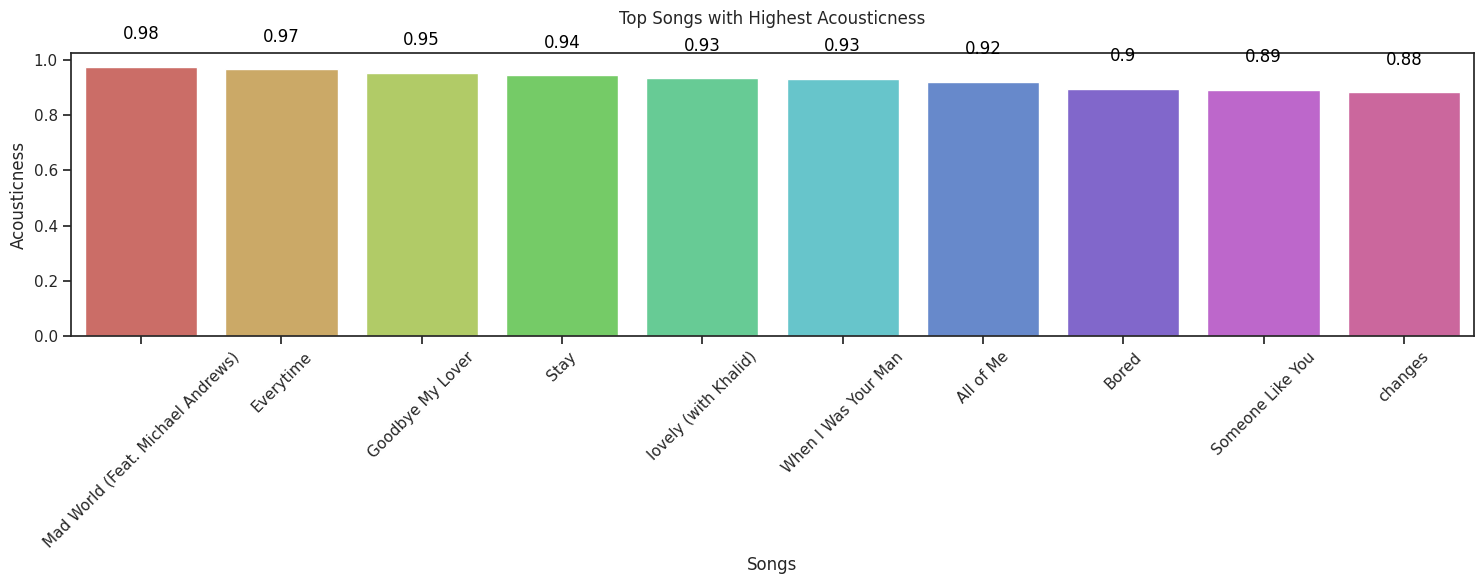

In [ ]:
#most acoustic song
plt.figure(figsize=(15,6))
sns.set(style="ticks")
x = df.groupby("song")["acousticness"].mean().sort_values(ascending=False).head(10)
palette_colors = sns.color_palette("hls",10)
ax = sns.barplot(x=x.index, y=x, palette=palette_colors)

for i, val in enumerate(x):
    ax.text(i, val + 0.1, round(val, 2), ha='center', color='black')

ax.set_title("Top Songs with Highest Acousticness\n")
ax.set_ylabel('Acousticness')
ax.set_xlabel ('Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
top_3_max_acousticness = df.nlargest(3, 'acousticness')
print(top_3_max_acousticness[['song', 'year', 'acousticness']])

                                  song  year  acousticness
496  Mad World (Feat. Michael Andrews)  2001         0.976
459                          Everytime  2003         0.966
680                   Goodbye My Lover  2005         0.953


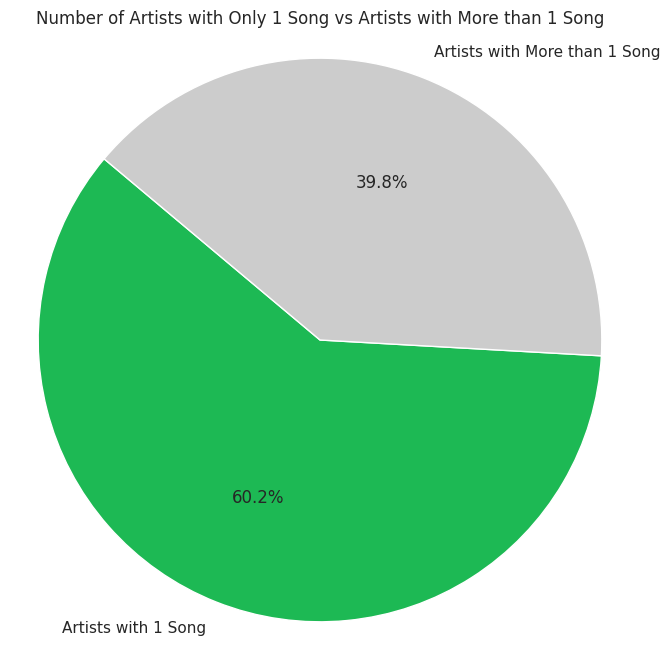

In [ ]:
#artist with one song vs more than one song
artists_with_one_song = artists[artists == 1].count()
artists_with_more_than_one_song = artists[artists > 1].count()

# Create the pie chart
labels = ['Artists with 1 Song', 'Artists with More than 1 Song']
sizes = [artists_with_one_song, artists_with_more_than_one_song]
colors = ['#1DB954', '#CCCCCC']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of Artists with Only 1 Song vs Artists with More than 1 Song')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

In [ ]:
#Vizualizing genre
def split_genres(genre):
    g = genre.replace(" ", '').split(',')
    g = [t for t in g if t != 'set()']
    return g

def flatten(t):
    return [item for sublist in t for item in sublist]

def remove_duplicates(l):
    res = []
    l = [res.append(x) for x in l if x not in res]
    return res

all_genres = remove_duplicates(flatten(list(df['genre'].apply(split_genres))))

genre_count = {genre: 0 for genre in all_genres}

for song in list(df['genre']):
    for genre in split_genres(song):
        genre_count[genre]+=1

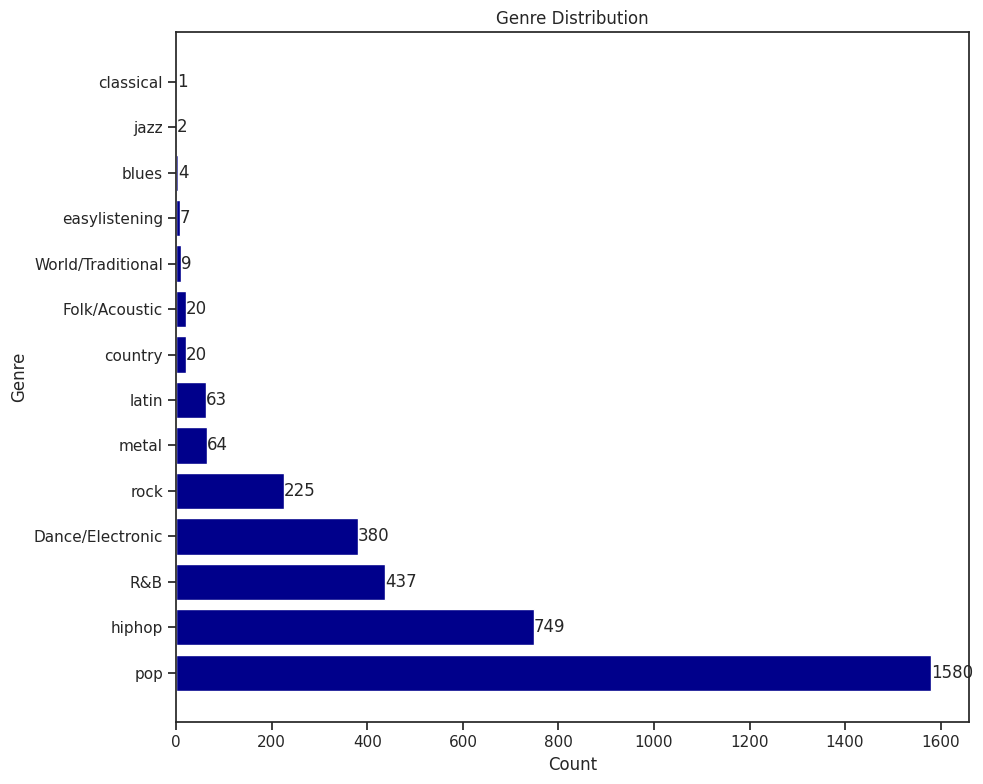

In [ ]:
sorted_genre_counts = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)

genre_names = [genre[0] for genre in sorted_genre_counts]
genre_counts = [genre[1] for genre in sorted_genre_counts]

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(genre_names, genre_counts, color='darkblue')

for bar, count in zip(bars, genre_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count), ha='left', va='center')

plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


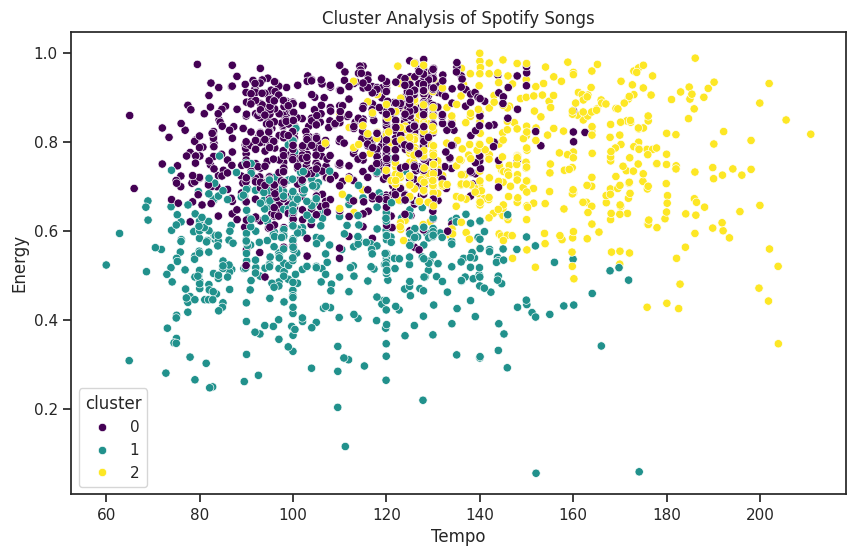

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

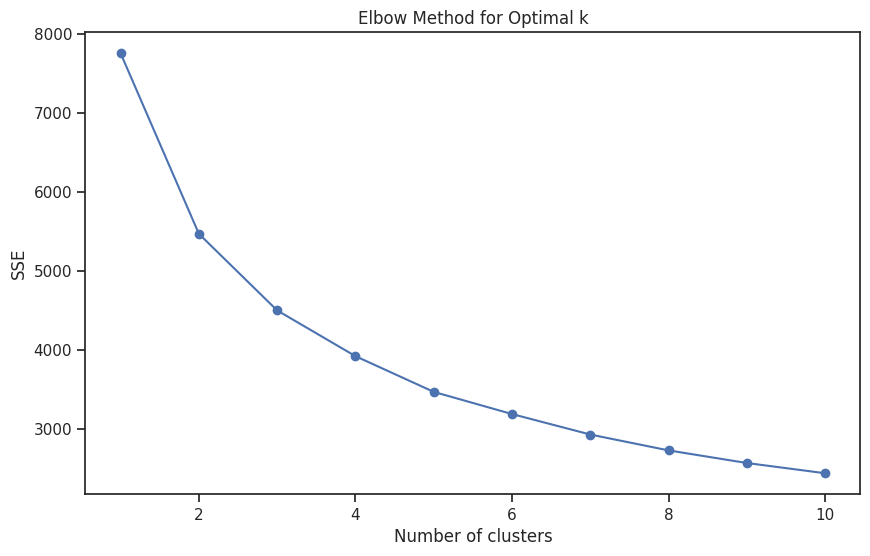

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting the relevant features for clustering
features = df[['tempo', 'valence', 'loudness', 'energy']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-means clustering
# You might need to choose the number of clusters (k) wisely; start with k=3 for simplicity
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Adding the cluster labels to your original dataframe
df['cluster'] = kmeans.labels_

# Visualizing the clusters for two dimensions (for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='energy', hue='cluster', data=df, palette='viridis', legend='full')
plt.title('Cluster Analysis of Spotify Songs')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.show()

# To choose the optimal number of clusters, you can use the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()